In [1]:
import os
import cv2
from matplotlib import pyplot as plt
from enum import Enum

# local help functions
from data_preprocessing import DataPreprocessing
from feature_extraction import FeatureExtraction
from hand_recognition_main import DataLoader

In [2]:
#methods for debugging - easier to watch images in jupyter notebook
#cv_imshow uses opencv gtk gui - to close image hit any key - otherwise jupyter will freeze!
def cv_imshow(windowname, image):
    cv2.imshow(windowname,image) 
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
#plt_imshow uses pyplot from matplotlib
def plt_imshow(windowname, image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(windowname)
    plt.show()

In [3]:
dLoader_obj = DataLoader(os.path.join("Processed","ResizedImages"))
dLoader_obj.describeLoadedData()
dLoader_obj.loadImagesCv()

Found: 20 images in folder.
Loaded: 20 images.


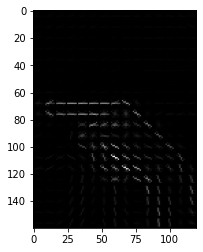

In [25]:
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

image = dLoader_obj.imagesList_cv[0]
# image = resize(image, (128*4, 64*4))
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.imshow(hog_image, cmap="gray")   


# for counter, img in enumerate(dLoader_obj.imagesList_cv): 
#     plt.axis("off")
#     plt.imshow(img)

#     # resized_img = resize(img, (128*4, 64*4))
#     # plt.axis("off")
#     plt.imshow(resized_img)

#     fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
#                         cells_per_block=(2, 2), visualize=True, multichannel=True)
#     plt.axis("off")

#     folder = 'test_folder'

#     filename = f'image{counter}.jpg'

#     plt.imshow(hog_image, cmap="gray")   

#     save_path = os.path.join(folder, filename)
#     # cv2.imwrite(save_path, hog_image) 
#     imsave(save_path, hog_image, )
#     # break


In [7]:
image = dLoader_obj.imagesList_cv[0]


winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0 # mean simply false.
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

winStride = (8,8)
padding = (8,8)
locations = ((10,20),)


hist = hog.compute(image,winStride,padding,locations)

ValueError: 'grey' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'